# EE304 - Neuromorphics: Brains in Silicon

## The brain's computational style

<img src=files/lecture2/AnalogDendriteDigitalAxon.png width=600px>

- To be robust to:
    - Heterogeneity: Variatons of ion-channel counts from neuron to neuron and synapse to synapse 
    - Stochasticity: Probabilistic opening of ion-channels in response to ligand or voltage-gating
- The brain combines:
    - Analog Computation
    - Digital Communication

## The four neuronal elements 

<img src="files/lecture10/TwoNeuronNetwork.png" width="720">

In all, a neuron has four elements:

- <b>Axon</b>: Communicates its spikes to other neurons
- <b>Synapse</b>: Coverts a spike to a graded potential
- <b>Dendrite</b>: Summates these graded potentials 
- <b>Soma</b>: Converts these summated graded potentials to a spike train

## Simple silicon synapse and neuron

<img src=files/lecture10/AnalogNeuron.pdf width=600px>

- Axon: Metal Wire
    - Receives digital pulses that represent incoming spikes
    - Broadcasts these pulses to all synapses it is connected to 
- Synapse: Switched Current-Source
    - Incoming pulses switch on the current source (or sink)
    - Meters a fixed amount of charge onto the "dendrite" 
- Dendrite: Metal Wire
    - Integrates the charge delivered by the "synapses" 
    - The resulting voltage is determined by its capacitance
- Soma: Voltage Comparator
    - Switches its output from 0 to 1 when the voltage exceeds a threshold
    - When the output is 1, it closes a switch that discharges the capacitor
    - This resets the output to 0, resulting in a brief pulse

## The neural engineering framework (NEF)

<img src=files/lecture2/nef_book.png width=400px>

- A method to synthesize synaptic weights to get a neural net to perform mathematically specified computations
- This brain-inspired method is attractive for neuromorphic hardware because it is:
    - Robust to heterogeneity: Transistor mismatch from neuron to neuron and synapse to synapse 
    - Tolerant to stochasticity: Nondeterministic operation of nanoscale transistors
    - Scaleable to millions of neurons connected by billions of synapses

## Only method for building neural nets that is completely general 

<img src=files/lecture1/book_cover.png width=300px>

- Has been used to build neural nets that perform:
    - Perception: Statistical inference
    - Cognition: Symbol-like processing
    - Action: Dynamical control
- Culminating in the world's first functioning whole-brain model
    - Closes the perception-cognition-action loop
    - Has 2.5M neurons connected by 1B synapses

## Vision: Character recognition

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('2j9rRHChtXk', width=720, height=400)

## Problem solving: Tower of Hanoi

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('sUvHCs5y0o8', width=720, height=400)

## SPAUN: The world's first functioning whole-brain model

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('P_WRCyNQ9KY', width=720, height=400, loop=1, autoplay=0)

## NEF's three principles
Synaptic weights are learned off-line by employing three principles:
- 1 Representation: Encodes ${\bf x}$ in a layer of spiking neurons
- 2 Transformation: Decodes the layer's spike trains to obtain ${\bf f(x)}$
- 3 Dynamics: Uses synaptic temporal dynamics to realize $\dot{\bf x}={\bf f(x)}+{\bf g(u)}$ (i.e., dynamic transformations) 

## Principle 1: Representation

- Activity of neurons change over time

<img src=files/lecture2/spikes.jpg width=800px>

## Encoding and decoding
- Have to define both to define a code
    - Value being represented:  $x$
    - Neural activity:  $a$
    - Neuron index: $i$
- Lossless code (e.g. Morse Code):
    - encoding: $a = f(x)$
    - decodng: $x = f^{-1}(a)$
- Lossy code:
    - encoding: $a = f(x)$
    - decoding: $\hat{x} = g(a) \approx x$

## Distributed representation

- Not just one neuron per $x$ value
    - Many different $a$ values for a single $x$
- Encoding: $a_i = f_i(x)$
- Decoding: $\hat{x} = g(a_0, a_1, a_2, a_3, ...)$

### Example 1: Binary representation

Encoding (nonlinear):
$$
a_i = \begin{cases}
    1 &\mbox{if } x \mod {2^{i+1}} \ge 2^{i} \\ 
    0 &\mbox{otherwise} 
    \end{cases}
$$

Decoding (linear):
$$
\hat{x} = \sum_i a_i 2^{i-1}
$$

--------------------

Suppose: $x = 13$

Encoding: 
$a_0 = 1$, $a_1 = 0$, $a_2 = 1$, $a_3 = 1$

Decoding:
$\hat{x} = 1*1+0*2+1*4+1*8 = 13$

Draw picture of $\hat{x}$ vs $x$, with curves for each bit and their sum.

### NEF uses linear decoding

- Write decoder as $\hat{x} = \sum_i d_i a_i$

- Linear decoding is nice and simple
    - Works fine with nonlinear encoding (!)

## What about encoding?

- What's the mapping between $x$ and $a$?
- This mapping is defined by the neurons' tuning curves
    - $a_i = f_i(x)$ 
- A tuning curve is built in two steps
    1. Convert $x$ into a current $J_i$
        - $x \rightarrow J_i$ 
    2. Convert $J_i$ into a spike-rate $a_i$
        - $J_i \rightarrow a_i$ 
- Together these two steps yield the tuning curve

### Response function

<img src=files/lecture1/NeuronStructure.jpg>
- The function that defines $J_i \rightarrow a_i$ is called the neuron's response function, $G_i$
- It depends on how the neuron converts its dendritic input current, $J_i$, to its somatic voltage
- In general, its spike-rate, $a_i$, goes up as total input current, $J_i$, goes up
- In NEF, $G_i$ can be practically any function
    - its parameters (deliberately) differ from one neuron to another (hence the index $i$) 

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('hxdPdKbqm_I', width=720, height=400, loop=1, autoplay=0) 

### Example 2: Rectified linear response function

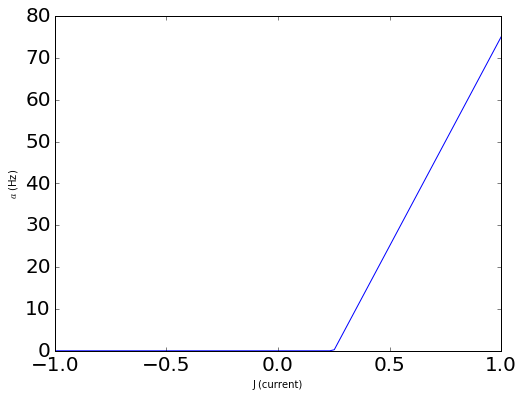

In [1]:
# Rectified linear neuron
import numpy
import nengo
import matplotlib 
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)
matplotlib.rcParams.update({'font.size':20})
import matplotlib.pyplot as plt
%matplotlib inline

n = nengo.neurons.RectifiedLinear() #n is a Nengo LIF neuron, these are defaults

J = numpy.linspace(-1,1,100)

plt.figure(figsize=(8,6))
plt.plot(J, n.rates(J, gain=100, bias=-25))
plt.xlabel('J (current)')
plt.ylabel('$a$ (Hz)');

### Example 3: Leaky integrate-and-fire response function

$$
a= \frac{1}{\tau_{ref}-\tau_{RC}\ln(1-\frac{1}{J})}
$$

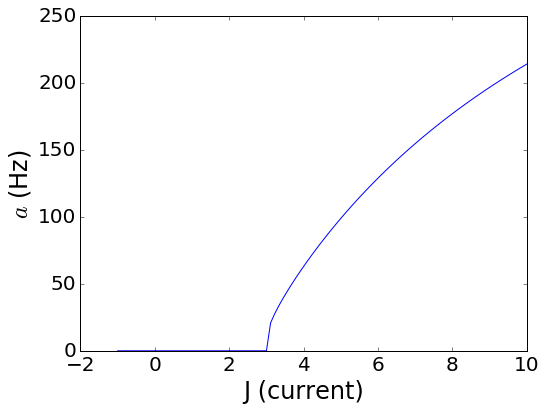

In [23]:
# Leaky integrate and fire
n = nengo.neurons.LIFRate(tau_rc=0.02, tau_ref=0.002) #n is a Nengo LIF neuron, these are defaults

J = numpy.linspace(-1,10,100)

plt.figure(figsize=(8,6));
plt.plot(J, n.rates(J, gain=1, bias=-2)) 
plt.xlabel('J (current)',fontsize=24)
plt.ylabel('$a$ (Hz)',fontsize=24);

## Tuning curves
- Neurons respond more strongly to particular values of $x$
    - How do they become 'tuned' to these  values?  or...
- What's the mapping between $x$ and $a$?
    - Consider eye position and arm movements

<img src="files/lecture2/horizontal_eye.jpg">

<img src="files/lecture2/armmovement1.jpg">

<img src="files/lecture2/armtuningcurve.png">

- Note that the experimenters are graphing $a_i$ as a function of $x$, that is $f_i(x)$
    - $x$ is much easier to measure than $J_i$
- Can these various tuning-curve shapes be reproduced by a simple generic form for the $x \rightarrow J_i$ map?

### Linear map: Monotonic tuning curves

The simplest form for $x \rightarrow J_i$ is a linear map
   - $ J_i = \alpha_i x + J_i^{\rm bias} $
   - $\alpha_i$ is a randomly chosen gain
   - $J_i^{\rm bias}$ is a randomly chosen offset

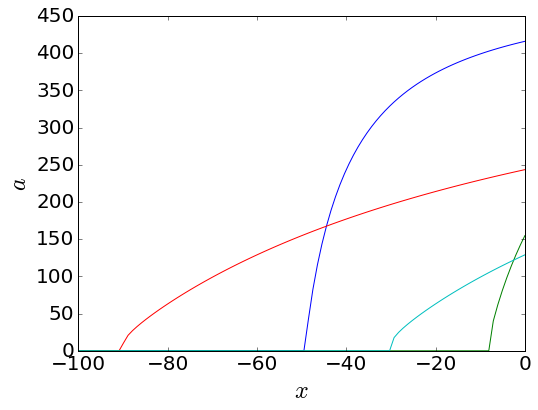

In [22]:
n = nengo.neurons.LIFRate() #n is a Nengo LIF neuron
x = numpy.linspace(-100,0,100)

plt.figure(figsize=(8,6))
plt.plot(x, n.rates(x, gain=1, bias=50), 'b') # x*1+50
plt.plot(x, n.rates(x, gain=0.1, bias=10), 'r') # x*0.1+10
plt.plot(x, n.rates(x, gain=0.5, bias=5), 'g') # x*0.05+5
plt.plot(x, n.rates(x, gain=0.1, bias=4), 'c') #x*0.1+4))

plt.xlabel(r'$x$',fontsize=24)
plt.ylabel(r'$a$',fontsize=24);

Depending on $\alpha_i$'s sign, this linear map yields tuning-curves that are
   - monotonically increasing ($\alpha_i > 0$)
   - monotonically decreasing ($\alpha_i < 0$)

How about nonmonotonic tuning curves? 

### Linear map: Nonmonotonic tuning curves
- There's usually some value of $x$ that maximizes the spike-rate $a_i$
    - ...and thus yields a maximum $J_i$
- $a_i$ (and $J_i$) decrease as you get farther from the preferred $x$ value
    - So something like $J_i = \alpha_i {\rm sim}(x, x_{\rm pref}) + J^{bias}$
- How can we introduce a similarity measure into our linear mapping?    
- Let's think about $x$ for a moment
    - $x$ can be anything... scalar, vector, etc.
    - Does thinking of it as a vector help?

# The encoding equation

- Here is a linear map that yields monotonic as well as nonmonotonic tuning curves
- $a_i = G_i(\alpha_i {\bf e}_i^{\rm T}{\bf x} + J_i^{\rm bias})$
    - Neuron $i$ is assigned a *preferred direction vector*, ${\bf e}_i$, callled its *encoder*
    - ${\bf e}_i$ has the same number of dimensions as ${\bf x}_i$ 
    - Their innner-product---the projection of ${\bf x}_i$ onto ${\bf e}_i$---is our similarity measure
    - Hence, we always make ${\bf e}$ have unit length---in the 1D case, $e$ is either +1 or -1
- The other variables' roles are
    - $\alpha$ is a gain term (constrained to always be positive)
    - $J^{\rm bias}$ is a constant bias term (may be positive or negative)
    - $G$ is the reponse function (determined by the neuron model)
    - $i$ indexes the neuron
    
### Example 4: 2D Tuning curve

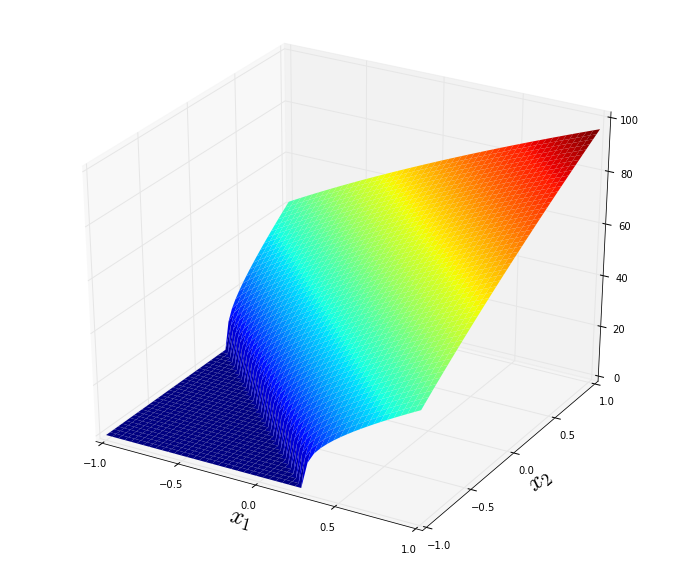

In [12]:
n = nengo.neurons.LIFRate()

e = numpy.array([1.0, 1.0]) 
e = e/numpy.linalg.norm(e)

a = numpy.linspace(-1,1,50)
b = numpy.linspace(-1,1,50)

X,Y = numpy.meshgrid(a, b)

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(X, Y, n.rates((X*e[0]+Y*e[1]), gain=1, bias=1.5), 
                    linewidth=0, cstride=1, rstride=1, cmap=plt.cm.jet)
ax.set_xlabel(r'$x_1$', fontsize=24);
ax.set_ylabel(r'$x_2$', fontsize=24);

- But experimenters don't usually sample *every possible* x
- Instead they might do some subset
    - For example, what if we just plot the points around the unit circle?

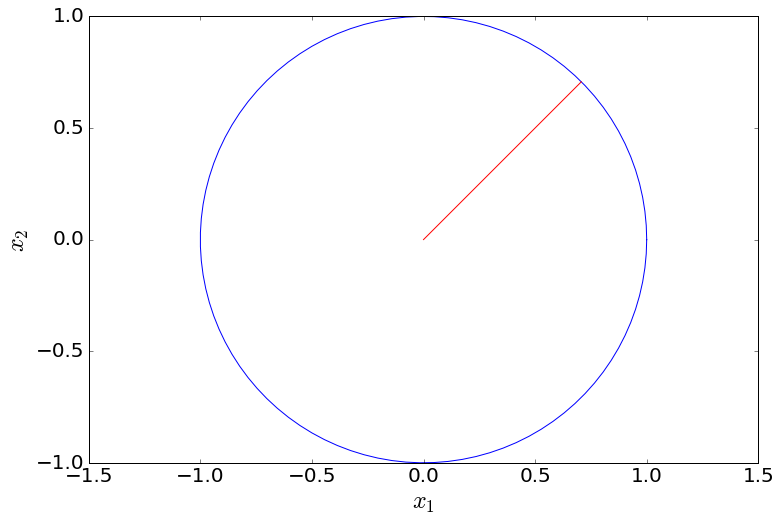

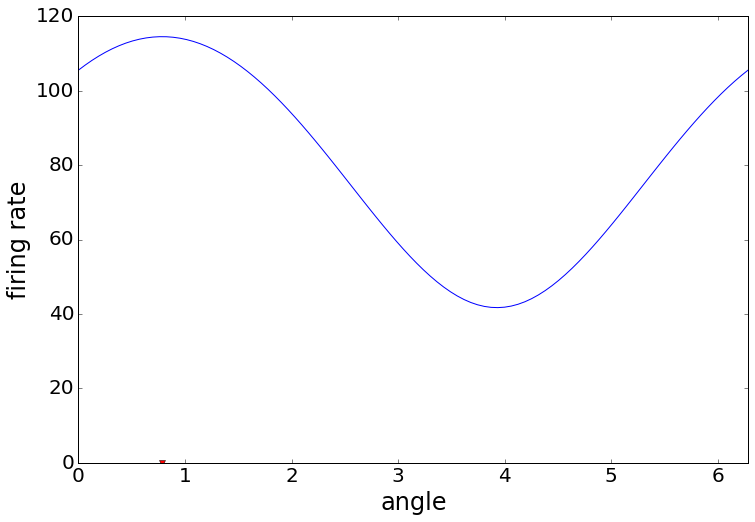

In [26]:
n = nengo.neurons.LIFRate()

theta = numpy.linspace(0, 2*numpy.pi, 100)
x = numpy.array([numpy.cos(theta), numpy.sin(theta)])
plt.figure(figsize=(12,8))
plt.plot(x[0],x[1])
plt.axis('equal')

e = numpy.array([1.0, 1.0])
e = e/numpy.linalg.norm(e)

plt.plot([0,e[0]], [0,e[1]],'r')
plt.xlabel(r'$x_1$', fontsize=24);
plt.ylabel(r'$x_2$', fontsize=24);

gain = 1
bias = 2.5

plt.figure(figsize=(12,8))
plt.plot(theta, n.rates(numpy.dot(x.T, e), gain=gain, bias=bias))
plt.plot([numpy.arctan2(e[1],e[0])],0,'rv')
plt.xlabel('angle',fontsize=24)
plt.ylabel('firing rate',fontsize=24)
plt.xlim(0, 2*numpy.pi);

- That starts looking a lot more like the real data.

## Summary 1: Encoding and Decoding

<img src="files/lecture14/NEF+ClassicNets.pdf" width="720">

- Encoding
    - $a_i = G_i(\alpha_i {\bf e}_i^{\rm T}{\bf x} + J^{\rm bias}_i)$
    
- Decoding
    - $\hat{\bf f}({\bf x}) = \sum_i a_i {\bf d}_i$
    
- The textbook uses $\phi$ for ${\bf d}$ and $\tilde \phi$ for ${\bf e}$
    - We're switching to ${\bf d}$ (for decoder) and ${\bf e}$ (for encoder)

## Where do the decoders come from?

<img src="files/lecture14/TuningCurves+f=Ad.pdf" width="840">

In NEF, the decoders are obtained by solving the following problem: 

- Express a function $f(x)$ as a weighted sum of $N$ neural tuning-curves $a_i(x)$.
- The function is sampled at $Q$ points, yielding a $Q\times 1$ vector ${\bf f}$
- The tuning curves are also sampled at these same $Q$ points, yielding a $Q \times N$ matrix ${\bf A}$
    - known as the *measurement matrix*
- The $N$ decoding weights, packed in a $N\times 1$ vector ${\bf d}$, are then obtained by solving 
    - ${\bf f} = {\bf Ad}$

## Solving for $d$

<img src="files/lecture2/CovarianceMatrix.pdf" width="360">
$
\begin{align}
{\bf f} &= {\bf A}{\bf d}\\
{\bf A}^{\rm T}{\bf f} &= {\bf A}^{\rm T}{\bf A}{\bf d}\\
\implies {\bf d} &= \left({\bf A}^{\rm T}{\bf A}\right)^{-1}{\bf A}^{\rm T}{\bf f}
\end{align}
$

We can rewrite this result as

$d = {\bf \Gamma}^{-1}{\bf \Upsilon}$ 

Where ${\bf \Gamma}$ is a matrix of covariances 
  - ${\bf \Gamma} ={\bf A}^{\rm T}{\bf A}$

Measures similarity of neuron $i$'s tuning curve to neuron $j$'s
  - $\Gamma_{ij} = {\bf a}_i^{\rm T}{\bf a}_j$

And ${\bf \Upsilon}$ is a vector of correlations
  - ${\bf \Upsilon} = {\bf A}^{\rm T}{\bf f}$

Measures similarity of neuron $i$'s tuning curve to the function ${\bf f}$
  - $\Upsilon_i = {\bf a}_i^{\rm T}{\bf f}$
  
It is possible to prove that the above solution for ${\bf d}$ minimizes the mean squared-error (MSE):
  - $E = \frac{1}{Q}\left({\bf f}-\sum_{i=1}^N d_i{\bf a}_i\right)^{\rm T}\left({\bf f}-\sum_{i=1}^N d_i{\bf a}_i\right)$


### Example 5: Computing decoder with Nengo

RMSE 0.0109959493933


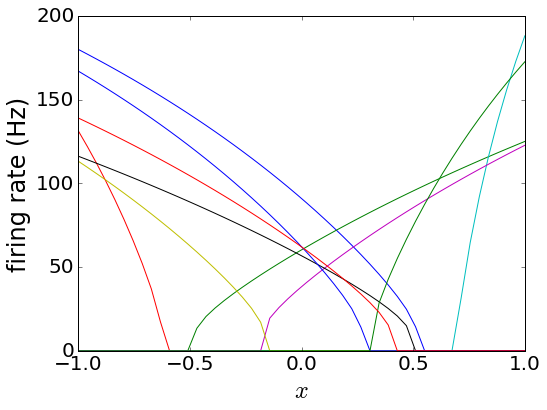

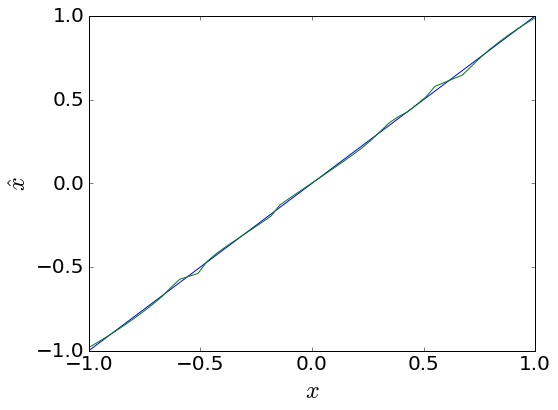

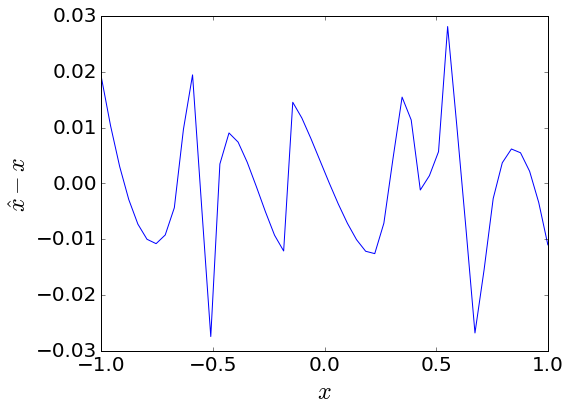

In [32]:
from nengo.utils.ensemble import tuning_curves
from nengo.dists import Uniform

N = 10

model = nengo.Network(label='Neurons')
with model:
    neurons = nengo.Ensemble(N, dimensions=1, 
                             max_rates=Uniform(100,200)) #Defaults to LIF neurons, 
                                        #with random gains and biases for
                                        #neurons between 100-200hz over -1,1

    connection = nengo.Connection(neurons, neurons, #This is just to generate the decoders
                                  solver=nengo.solvers.LstsqL2(reg=0)) #reg=0 means ignore noise
    
sim = nengo.Simulator(model)

d = sim.data[connection].decoders.T

x, A = tuning_curves(neurons, sim)

xhat = numpy.dot(A, d)

plt.figure(figsize=(8,6))
plt.plot(x, A)
plt.xlabel('$x$',fontsize=24)
plt.ylabel('firing rate (Hz)',fontsize=24)

plt.figure(figsize=(8,6))
plt.plot(x, x)
plt.plot(x, xhat)
plt.xlabel('$x$',fontsize=24)
plt.ylabel('$\hat{x}$',fontsize=24)
plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.figure(figsize=(8,6))
plt.plot(x, xhat-x)
plt.xlabel('$x$', fontsize=24)
plt.ylabel('$\hat{x}-x$',fontsize=24)
plt.xlim(-1, 1)

print 'RMSE', numpy.sqrt(numpy.average((x-xhat)**2))

### Example 6: How the various neurons contribute

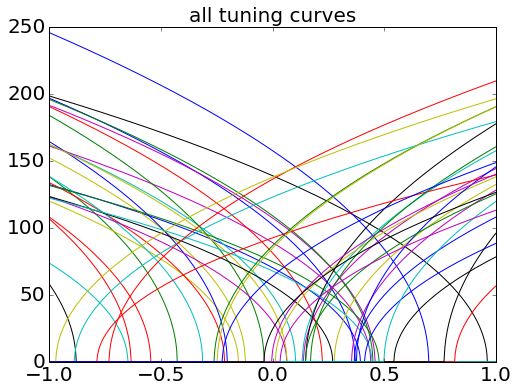

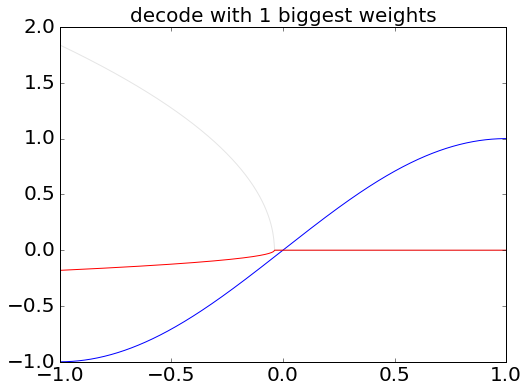

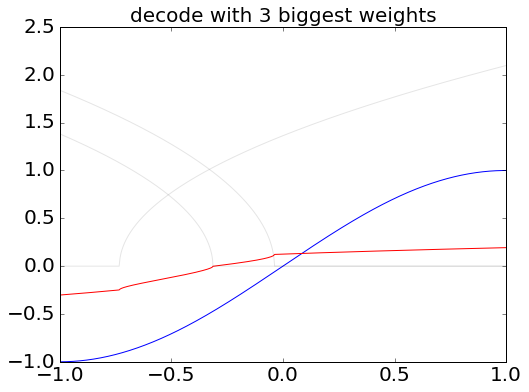

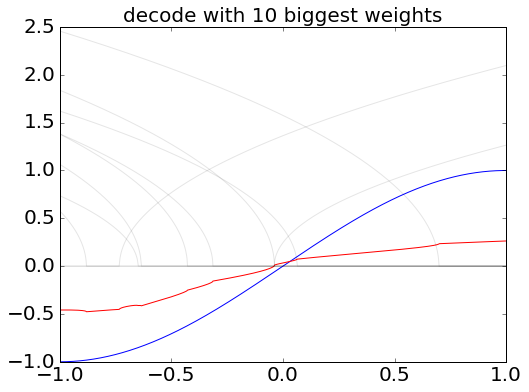

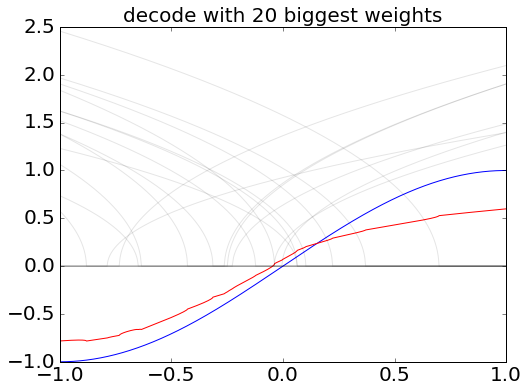

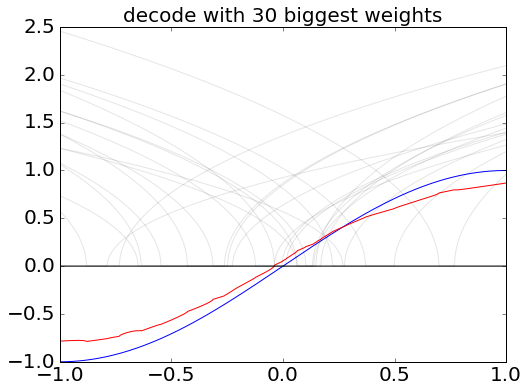

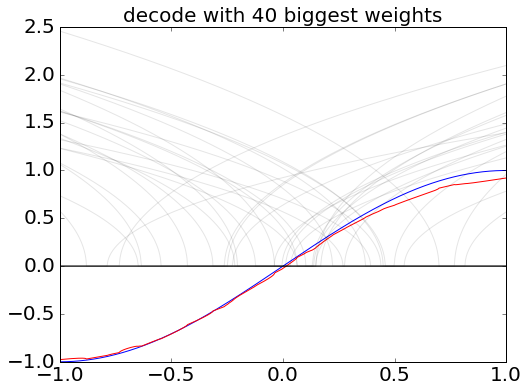

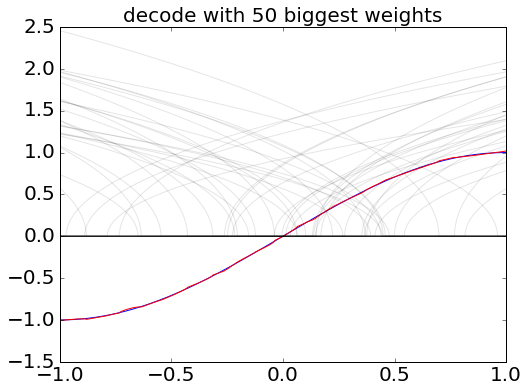

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)

bins = 1000
N = 50

# create tuning curves
I = np.zeros((bins, N))
for n in xrange(N):
    I[:, n] = np.linspace(-1, 1, bins)
biases = np.random.rand(N) * 2 - 1
gains = np.random.rand(N) + 1
enc = np.ones((N,))
enc[:N/2] *= -1
I = enc * I + biases
I[I < 0] = 0
# this actually isn't where gain is usually applied
# but we wanted to keep the uniform threshold distribution
# and still have some tuning curve slope variation without
# doing any tricky math
fscale = 100.
A = fscale * gains * np.sqrt(I) 

# add WGN, doesn't really make things more interesting
#A += fscale * .1 * np.random.normal(size=A.shape)

# plot tuning curves
plt.figure(figsize=(8,6))
x = np.linspace(-1, 1, 1000)
plt.plot(x, A)
plt.title('all tuning curves', fontsize=20)

# solve decoders
y = np.sin(np.pi/2. * np.linspace(-1, 1, bins))
y = y.reshape((bins, 1))
Ainv = np.linalg.pinv(A, rcond=.01)
d = Ainv.dot(y)

#yhat = A.dot(d)
#plt.figure()
#plt.plot(yhat)

# separate out subsets of n_d decoders and plot result
n_ds = [1, 3, 10, 20, 30, 40, N]
dargs = np.argsort(np.abs(d.flatten()))
for n_d in n_ds:
    dmod = d.copy()
    small_dargs = dargs[:-n_d]
    dmod[small_dargs] = 0
    yhat = A.dot(dmod)
    plt.figure(figsize=(8,6))
    plt.plot(x, y, 'b')
    plt.plot(x, yhat, 'r')
    plt.plot(x, 1/fscale * A[:, dargs[-n_d:]], 'k', alpha=.1)
    plt.title('decode with ' + str(n_d) + ' biggest weights',fontsize=20)